In [1]:
import sys
import time

sys.path.append("..")
import uniplot as up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import solv_fzcp as sfzcp
import uvarprob as uvpr

In [2]:
# test_file = "../test_casado.csv"
test_file = "../tst1.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,-0.5*x^2*(log(x))+5,0.2,7.0,0,0
3,-(sqrt(x))*sin(x)+1,0.2,7.0,0,0
4,x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3,0.2,7.0,0,0
5,x+sin(5.0*x),0.2,7.0,0,0
7,sin(x)*cos(x)-1.5*(sin(x))^2+1.2,0.2,7.0,0,0
9,2.0*sin(x)*exp(-x),0.2,7.0,0,0
10,(3*x-1.4)*sin(18.0*x)+1.7,0.2,7.0,0,0
11,(x+1)^3/x^2-7.1,0.2,7.0,0,0
13,12+cos(2.0*x+1)+2*cos(3.0*x+2)+3*cos(4.0*x+3)...,0.2,7.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
from FZCP.test import test_last

test_last(df, 1e-5, repeat=1)

test.Index,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.660 & 1.094 & 0.388 & 0.668 & 0.277 & 0.220 & 0.203 & 0.066 & 0.062 \\
2 & 0.218 & 0.525 & 0.544 & 0.324 & 0.311 & 0.234 & 0.225 & 0.125 & 0.120 \\
3 & 0.504 & 0.583 & 0.489 & 0.436 & 0.387 & 0.283 & 0.225 & 0.173 & 0.163 \\
4 & 0.283 & 0.339 & 0.246 & 0.254 & 0.248 & 0.145 & 0.111 & 0.079 & 0.076 \\
5 & 0.429 & 0.376 & 0.348 & 0.354 & 0.340 & 0.185 & 0.179 & 0.111 & 0.104 \\
6 & 0.226 & 2.707 & 2.641 & 0.336 & 0.319 & 1.002 & 1.032 & 0.173 & 0.170 \\
7 & 0.395 & 2.598 & 2.605 & 0.679 & 0.669 & 0.956 & 0.956 & 0.309 & 0.303 \\
8 & 1.772 & 874.442 & 150.496 & 10.753 & 3.242 & 371.760 & 56.958 & 5.134 & 1.266 \\
9 & 1.407 & 0.691 & 0.665 & 0.548 & 0.561 & 0.344 & 0.337 & 0.240 & 0.246 \\
10 & 0.465 & 1.420 & 1.072 & 0.320 & 0.305 & 0.549 & 0.454 & 0.082 & 0.067 \\
11 & 0.299 & 49.802 & 46.761 & 1.194 & 1.171 & 24.107 & 23.034 & 0.581 & 0.579 \\
12 & 0.268 & 0.486 & 0.478 & 0.278 & 0.272 & 0.205 & 0.200 & 0.094 & 0.091 \\
13 & 0.406

In [8]:
from FZCP.test import test_alg3

test_alg3(df, 1e-5, global_lip=True, repeat=10)

Index & IBB & local Lip & global Lip \
1 & 0.017948 & 0.005895 & 0.005650 \\
2 & 0.018010 & 0.011402 & 0.011200 \\
3 & 0.044381 & 0.014703 & 0.014148 \\
4 & 0.025157 & 0.007922 & 0.007413 \\
5 & 0.036819 & 0.010874 & 0.009984 \\
6 & 0.026004 & 0.043887 & 0.042816 \\
7 & 0.112097 & 0.022249 & 0.031522 \\
8 & 0.275499 & 0.067334 & 0.186010 \\
9 & 0.135828 & 0.026793 & 0.023721 \\
10 & 0.041589 & 0.006779 & 0.006512 \\
11 & 0.025804 & 0.057622 & 0.057204 \\
12 & 0.023836 & 0.009039 & 0.008769 \\
13 & 0.036244 & 0.008534 & 0.008271 \\
14 & 0.079829 & 0.012732 & 0.012408 \\
15 & 0.230028 & 0.024817 & 0.021442 \\
16 & 0.021519 & 0.008819 & 0.008727 \\
17 & 0.224108 & 0.015723 & 0.015315 \\
18 & 0.029081 & 0.009992 & 0.009677 \\
19 & 0.099058 & 0.065005 & 0.099523 \\
20 & 0.016099 & 0.012161 & 0.011923 \\
21 & 0.016768 & 0.005218 & 0.005036 \\
22 & 0.077930 & 0.056636 & 0.061834 \\
Min & 0.5 & 0.4 & 1.0 \\
Max & 14.6 & 1.2 & 1.0 \\
Average & 3.8 & 1.0 & 1.0 \\
Index & IBB & local Lip & global

In [9]:
from FZCP.test import test_alg3

test_alg3(df, 1e-5, global_lip=False, repeat=1)

1
PSQE, Lipschitz interval: TestResult(nsteps=4, first_crossing_zero_point=[[3.012, 3.012]])
time= 0.27045898605138063 period: 0
Linear, Lipschitz interval: TestResult(nsteps=35, first_crossing_zero_point=[[3.012, 3.012], [3.012, 3.012]])
time= 0.5755840102210641 period: 0
3
PSQE, Lipschitz interval: TestResult(nsteps=8, first_crossing_zero_point=[[1.175, 1.175]])
time= 0.22795796394348145 period: 0
Linear, Lipschitz interval: TestResult(nsteps=37, first_crossing_zero_point=[[1.175, 1.175], [1.175, 1.175], [1.175, 1.175], [1.175, 1.175]])
time= 0.595040968619287 period: 0
4
PSQE, Lipschitz interval: TestResult(nsteps=8, first_crossing_zero_point=[[2.961, 2.961]])
time= 0.23750006221234798 period: 0
Linear, Lipschitz interval: TestResult(nsteps=33, first_crossing_zero_point=[[2.961, 2.961]])
time= 0.502042006701231 period: 0
5
PSQE, Lipschitz interval: TestResult(nsteps=9, first_crossing_zero_point=[[0.821, 0.821]])
time= 0.1462919171899557 period: 0
Linear, Lipschitz interval: TestResu

In [10]:
from FZCP.test import test_casado

test_casado(df, 1e-5, repeat=100)

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R


TypeError: 'tuple' object does not support item assignment

In [9]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    # #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_psl_points_list']))
    # print('Piyavskii, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    #
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    # period = 0
    # T1 = time.perf_counter()
    # print('Piyavskii, Lipschitz interval:',
    #       sfzcp.correctly(prob, symm=False, epsilon=1e-10, global_lipschitz_interval=False, estimator=1, reduction=1,
    #                        period_comp_lip=period))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1)*1000, 'period:', period)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_lip_points_list']))
    # print('PSQE, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=2))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']),True)

    period = 0
    T1 = time.perf_counter()
    print('PSQE, Lipschitz interval:',
          sfzcp.new_method(prob, symm=False, epsilon=1e-10, global_lipschitz_interval=False, estimator=2, reduction=1,
                           period_comp_lip=period))
    T2 = time.perf_counter()
    print('time=', (T2 - T1)*1000, 'period:', period)
    
    # T1 = time.perf_counter()
    # print(sfzcp.new_method(prob, symm=False, epsilon=1e-5, global_lipschitz_interval=True, estimator=2, reduction=1))
    # T2 = time.perf_counter()
    # print( (T2 - T1)*1000)
    # T1 = time.perf_counter()
    # print('Casado:',
    #       sfzcp.cas(prob=prob, sym=True, epsilon=1e-4))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

1
PSQE, Lipschitz interval: TestResult(nsteps=35, first_crossing_zero_point=[[3.012, 3.012], [3.012, 3.012]])
time= 1.5668330015614629 period: 0
3
PSQE, Lipschitz interval: TestResult(nsteps=37, first_crossing_zero_point=[[1.175, 1.175], [1.175, 1.175], [1.175, 1.175], [1.175, 1.175]])
time= 0.34504104405641556 period: 0
4
PSQE, Lipschitz interval: TestResult(nsteps=33, first_crossing_zero_point=[[2.961, 2.961]])
time= 0.33762503881007433 period: 0
5
PSQE, Lipschitz interval: TestResult(nsteps=23, first_crossing_zero_point=[[0.821, 0.821]])
time= 0.4218750400468707 period: 0
7
PSQE, Lipschitz interval: TestResult(nsteps=26, first_crossing_zero_point=[[1.341, 1.341]])
time= 0.251209014095366 period: 0
9
PSQE, Lipschitz interval: TestResult(nsteps=217, first_crossing_zero_point=[[3.138, 3.138], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.141, 3.141], [3.142, 3.142], [3.1

In [12]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
min_list = (float('inf'),) * 8
max_list = (0,) * 8
sum_list = (0,) * 8
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    T1 = time.perf_counter()
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PC_N = T2 - T1
    min_list[0] = min(min_list[0], T2 - T1)
    max_list[0] = max(max_list[0], T2 - T1)
    sum_list[0] += T2 - T1
    T1 = time.perf_counter()
    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PI_N = T2 - T1
    min_list[1] = min(min_list[1], T2 - T1)
    max_list[1] = max(max_list[1], T2 - T1)
    sum_list[1] += T2 - T1
    T1 = time.perf_counter()
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QC_N = T2 - T1
    min_list[2] = min(min_list[2], T2 - T1)
    max_list[2] = max(max_list[2], T2 - T1)
    sum_list[2] += T2 - T1
    T1 = time.perf_counter()
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QI_N = T2 - T1
    min_list[3] = min(min_list[3], T2 - T1)
    max_list[3] = max(max_list[3], T2 - T1)
    sum_list[3] += T2 - T1
    T1 = time.perf_counter()
    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PC_R = T2 - T1
    min_list[4] = min(min_list[4], T2 - T1)
    max_list[4] = max(max_list[4], T2 - T1)
    sum_list[4] += T2 - T1
    T1 = time.perf_counter()
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PI_R = T2 - T1
    min_list[5] = min(min_list[5], T2 - T1)
    max_list[5] = max(max_list[5], T2 - T1)
    sum_list[5] += T2 - T1
    T1 = time.perf_counter()
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QC_R = T2 - T1
    min_list[6] = min(min_list[6], T2 - T1)
    max_list[6] = max(max_list[6], T2 - T1)
    sum_list[6] += T2 - T1
    T1 = time.perf_counter()
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QI_R = T2 - T1
    min_list[7] = min(min_list[7], T2 - T1)
    max_list[7] = max(max_list[7], T2 - T1)
    sum_list[7] += T2 - T1

    # print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' %(test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R))
    print('%s & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f \\\\' % (
        test.Index, time_PC_N, time_PI_N, time_QC_N, time_QI_N, time_PC_R, time_PI_R, time_QC_R, time_QI_R))

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
0.911152374259570


TypeError: 'tuple' object does not support item assignment

In [ ]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps

    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps

    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps

    print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' % (
        test.Index, PC_N, PI_N, QC_N, QI_N, PC_R, PI_R, QC_R, QI_R))
    # P: Piyavskii estimator
    # Q: Piecewise smooth quadratic estimator
    # C: Lipschitz constant
    # I: Lipschitz interval
    # N: without reduction
    # R: with reduction

In [9]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index='benchmark1', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)-7', a=0, b=1, min_f=0, min_x=0)


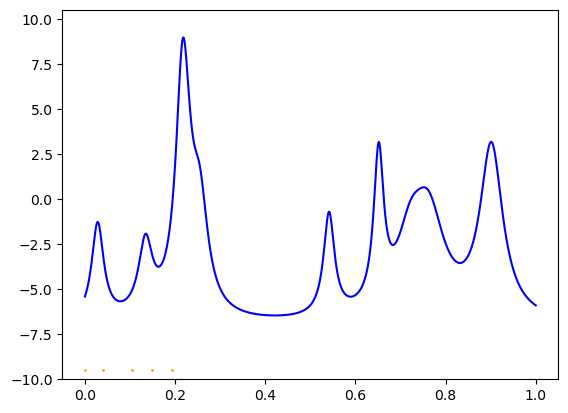

Pandas(Index='benchmark2', objective='x^3+2.*x+cos(10.*x)', a=-3, b=3, min_f=0, min_x=0)


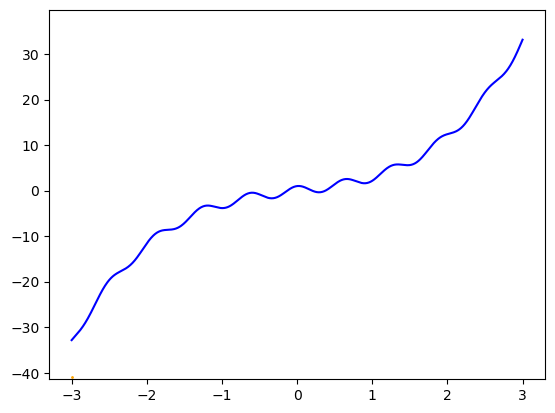

Pandas(Index='benchmark3', objective='(3.0-x)*(x-1.0)^2', a=0, b=4, min_f=0, min_x=0)


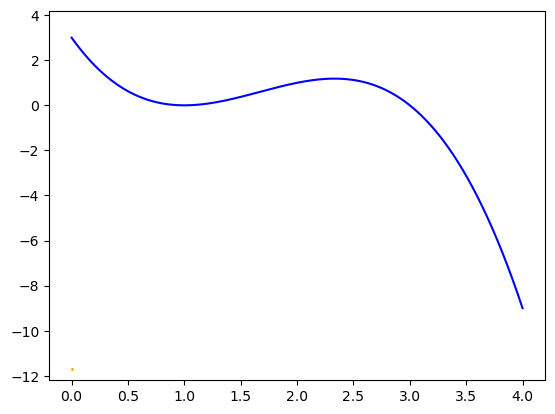

In [10]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['bnb2_psl_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_pslint_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lip_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lipint_points_list'], 3, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lipint_points_list'], 4, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lip_points_list'], 5, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    file_name = test.Index + '.png'
    plt.savefig(file_name, dpi=500)
    plt.show()